In [1]:
# Multiple fleets, Graphs

#### On Feb 28 2023 

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [30]:
sns.set(rc={'figure.figsize':(20,14)})
sns.set_theme(style="whitegrid")

In [6]:
df_lorenz = pd.read_csv('C:/Users/annik/tmpOnATBcomputer/sf_2018_stacked_rh_fltsz_price_1.csv')

In [24]:
#df_lorenz.info()
#print(df_lorenz.columns.tolist())
#print(df_lorenz.columns.values)

In [8]:
df_lorenz["theNumber1"] = 1
df_lorenz["baseline"] = df_lorenz["theNumber1"].where( df_lorenz['lever_position_price'].eq(1.0) 
                                                     & df_lorenz['lever_position_fltsz'].eq(1.0) 
                                                     & df_lorenz['lever_n_fleets'].eq(2.0),
                                                     0)

In [28]:
# CHOOSE which to make relative to baseline
temp_varName = "Potential_INEXUS_mean" # Potential_INEXUS_mean
temp_varNameRel = "PI_mean_relToBase" # 

df_lorenz['temp_varName_baseOnly'] = df_lorenz[temp_varName].where(df_lorenz['baseline']==1) # only not NA if it's at baseline
df_lorenz['temp_varName_base'] = df_lorenz.groupby(["incRank"])['temp_varName_baseOnly'].transform('max')
df_lorenz[temp_varNameRel]=df_lorenz['temp_varName_base']-df_lorenz[temp_varName]
#df_lorenz.groupby(["incRank"])[temp_varName].describe()
#df_lorenz.groupby(["incRank"])['temp_varName_base'].describe()
#df_lorenz[['baseline','incRank','Potential_INEXUS_mean',temp_varName,'temp_varName_baseOnly','temp_varName_base',temp_varNameRel,'lever_n_fleets', 'lever_position_fltsz','lever_position_price']].head(56)

In [21]:
#plt.hist(df_lorenz[temp_varNameRel])

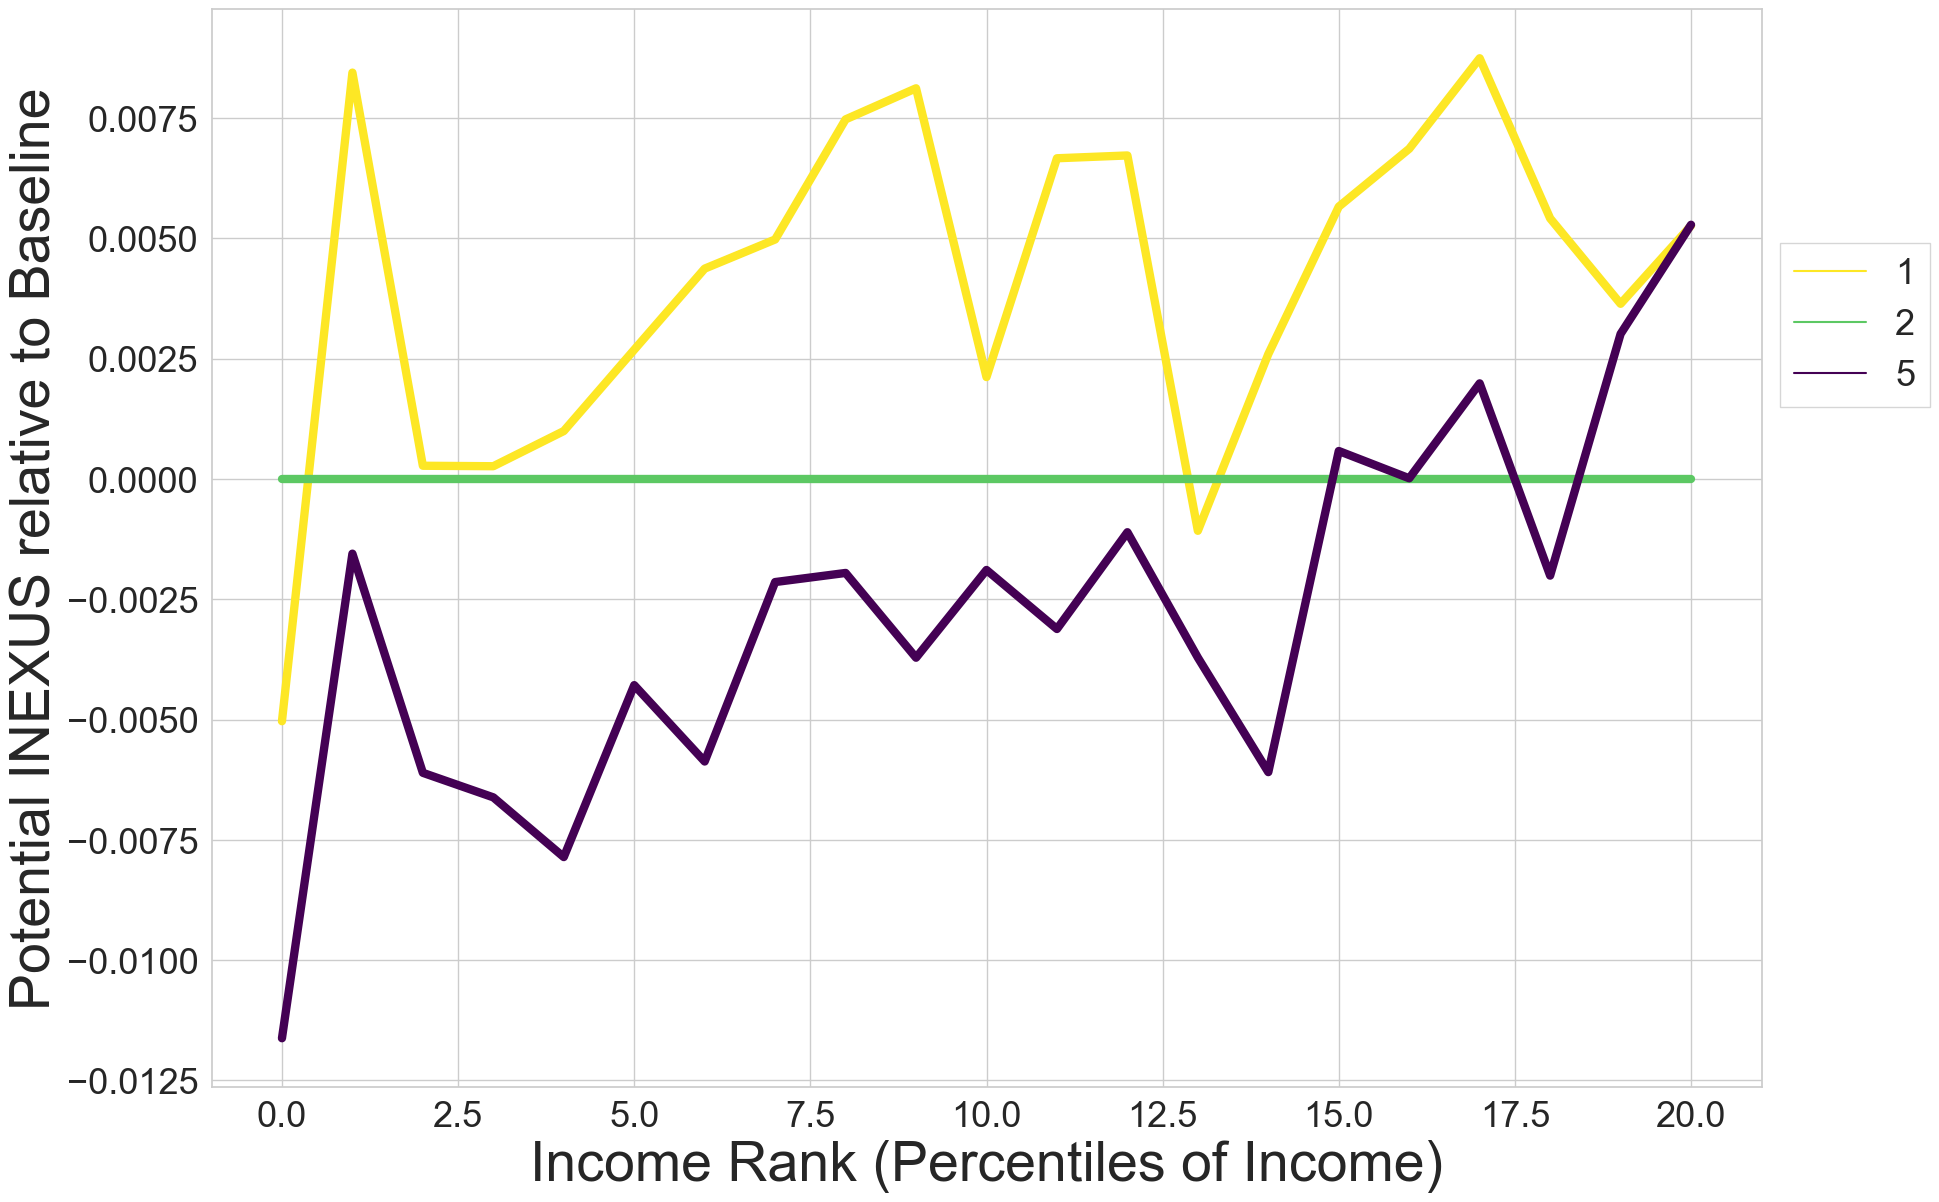

In [36]:
t_plot = sns.lineplot(data = df_lorenz.loc[(df_lorenz['lever_position_price']==1)|(df_lorenz['lever_position_fltsz']==1)], 
             x = 'incRank', 
             y = temp_varNameRel, 
             hue = 'lever_n_fleets', 
             #palette = palette, 
             ci=None, linewidth = 6,
             palette = 'viridis_r'
            )
t_plot.set_xlabel('Income Rank (Percentiles of Income)', fontsize = 40)
t_plot.set_ylabel('Potential INEXUS relative to Baseline', fontsize = 40)
t_plot.yaxis.set_tick_params(labelsize = 26)
t_plot.xaxis.set_tick_params(labelsize = 26)
t_plot.legend(fontsize='medium', fancybox=False, bbox_to_anchor=(1, 0.8), ncol=1, frameon=True, loc = 'best', prop={'size': 26})
plt.savefig('lorenz_viridisATB.svg', format='svg')
#plt.savefig('lorenz_viridisATB.png', dpi=1000)

In [ ]:
fig, ax = plt.subplots()
ax = sns.lineplot(data = df_lorenz.loc[(df_lorenz['lever_position']>-1)|(df_lorenz['lever_position_fleetsize']==1)], x = 'incRank', 
                  y = 'logsum_relative_to_baseline', hue = 'lever_position', palette = palette, ci=None, linewidth = 6)
ax.set_xlabel('Income Rank (Percentiles of Income)', fontsize = 36)
ax.set_ylabel('Potential INEXUS relative to Baseline', fontsize = 36)
ax.yaxis.set_tick_params(labelsize = 26)
ax.xaxis.set_tick_params(labelsize = 26)
plt.legend(labels = ['0% Price', '12.5% Price', '25% Price','50% Price','Baseline','175% Price','300% Price', '500% Price','800% Price'],
         fontsize='medium', fancybox=False, bbox_to_anchor=(1, 0.8), ncol=1, frameon=True, loc = 'best', prop={'size': 26})
#plt.savefig('lorenz.svg', format='svg', bbox_extra_artists=(ax.legend(['0% Price', '12.5% Price', '25% Price','50% Price','Baseline','175% Price','300% Price', '500% Price','800% Price'], loc="best", fontsize=26),), bbox_inches='tight')
#plt.savefig('lorenz.png', dpi=1000)